In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

In [2]:
#pd.read_csv('/Users/andrejglavniy/Downloads/customer-churn-prediction-2020/train.csv')

In [3]:
train = pd.read_csv('/Users/andrejglavniy/Downloads/customer-churn-prediction-2020/train.csv')

In [4]:
train.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

Для задачи классификации подойдет столбец - churn , два варианта результата : yes, no.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

## Поиск дубликатов/пропусков

In [6]:
train.duplicated().sum()

0

In [7]:
train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

дубликатов в наборе данных нет. Пропусков , исходя из info тоже.

## Разведывательный АД

посмотрим какие столбцы категориальные , какие кол-ые.

In [8]:
def num_cat(train):
    cat_columns = []
    num_columns = []
    for i in train.columns:
        if train[i].dtype == 'object':
            cat_columns.append(i)
        else:
            num_columns.append(i)
    return num_columns, cat_columns

In [9]:
num_columns, cat_columns = num_cat(train)

In [10]:
# выводим результат
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))
print()
print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'] 
 Число столблцов =  5

Числовые данные:	  ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls'] 
 Число столблцов =  15


# Анализ числовых признаков

In [11]:
train.describe()

account_length  number_vmail_messages  total_day_minutes  \
count     4250.000000            4250.000000        4250.000000   
mean       100.236235               7.631765         180.259600   
std         39.698401              13.439882          54.012373   
min          1.000000               0.000000           0.000000   
25%         73.000000               0.000000         143.325000   
50%        100.000000               0.000000         180.450000   
75%        127.000000              16.000000         216.200000   
max        243.000000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      4250.000000       4250.000000        4250.000000      4250.000000   
mean         99.907294         30.644682         200.173906       100.176471   
std          19.850817          9.182096          50.249518        19.908591   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.365000         165.925000        87.000000   
50%         100.000000         30.680000         200.700000       100.000000   
75%         113.000000         36.750000         233.775000       114.000000   
max         165.000000         59.760000         359.300000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       4250.000000          4250.000000        4250.000000   
mean          17.015012           200.527882          99.839529   
std            4.271212            50.353548          20.093220   
min            0.000000             0.000000           0.000000   
25%           14.102500           167.225000          86.000000   
50%           17.060000           200.450000         100.000000   
75%           19.867500           234.700000         113.000000   
max           30.540000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         4250.000000         4250.000000       4250.000000   
mean             9.023892           10.256071          4.426353   
std              2.265922            2.760102          2.463069   
min              0.000000            0.000000          0.000000   
25%              7.522500            8.500000          3.000000   
50%              9.020000           10.300000          4.000000   
75%             10.560000           12.000000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls  
count        4250.000000                    4250.000000  
mean            2.769654                       1.559059  
std             0.745204                       1.311434  
min             0.000000                       0.000000  
25%             2.300000                       1.000000  
50%             2.780000                       1.000000  
75%             3.240000                       2.000000  
max             5.400000                       9.000000

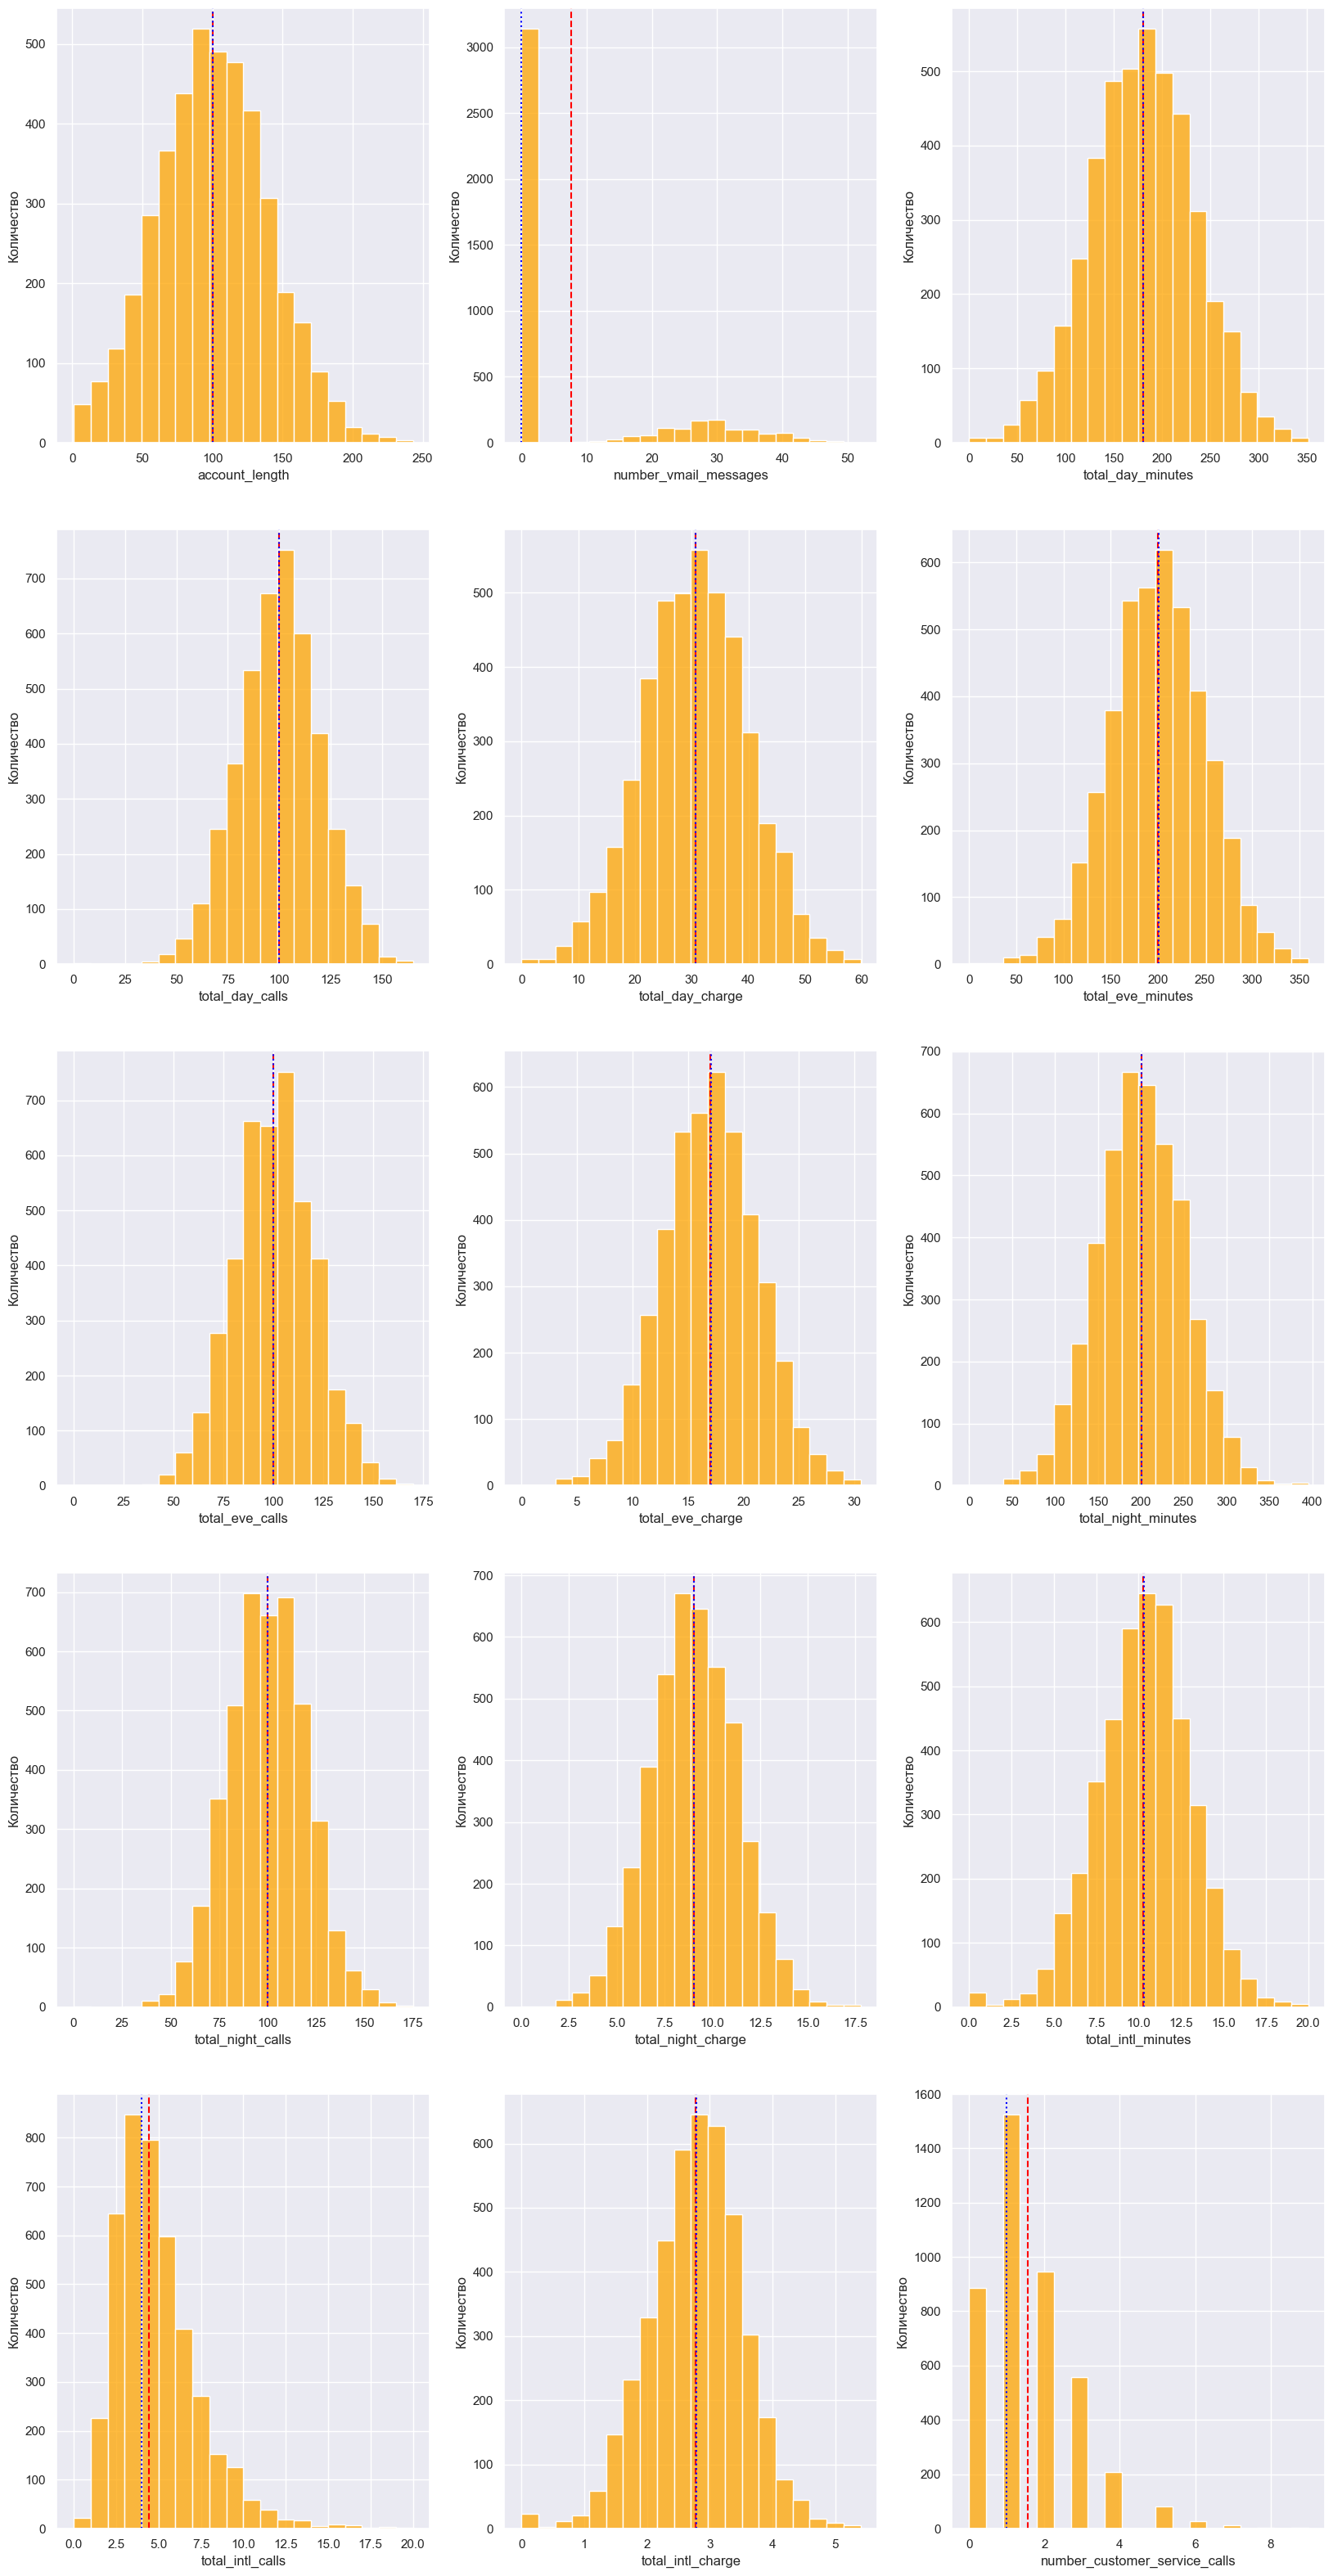

In [12]:
width = 3
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(20,40)) # создаем "полотно", на котором будем "рисовать" графики
#     ↑  более точная структура (почти синоним subplot). Говорим что у нас будет height строк и width столбцов

for idx, column_name in enumerate(num_columns): # перебираем все числовые данные
    plt.subplot(height,width, idx+1) #берем конкретную ячейку из заранее подготовленную заготовку
    # рисуем с помощью библиотеки seaborn
    sns.histplot(data=train, # какой датафрейм используем
            x=column_name, # какую переменную отрисовываем
            bins = 20,
            color='orange');  # на сколько ячеек разбиваем
    sns.color_palette("tab10")
    plt.ylabel("Количество")
    plt.axvline(train[column_name].mean(), color ="red", linestyle="--", label= "mean")
    plt.axvline(train[column_name].median(), color ="blue", linestyle=":", label= "median")
    #plt.subplots_adjust(hspace = 0.8)

В основном признаки имеют нормальное распределенеи . Интересно рассмотреть: 
* Столбцы имеют явные аномалии number_vmail_messages, в котором медиана равно 0
* number_customer_service_calls

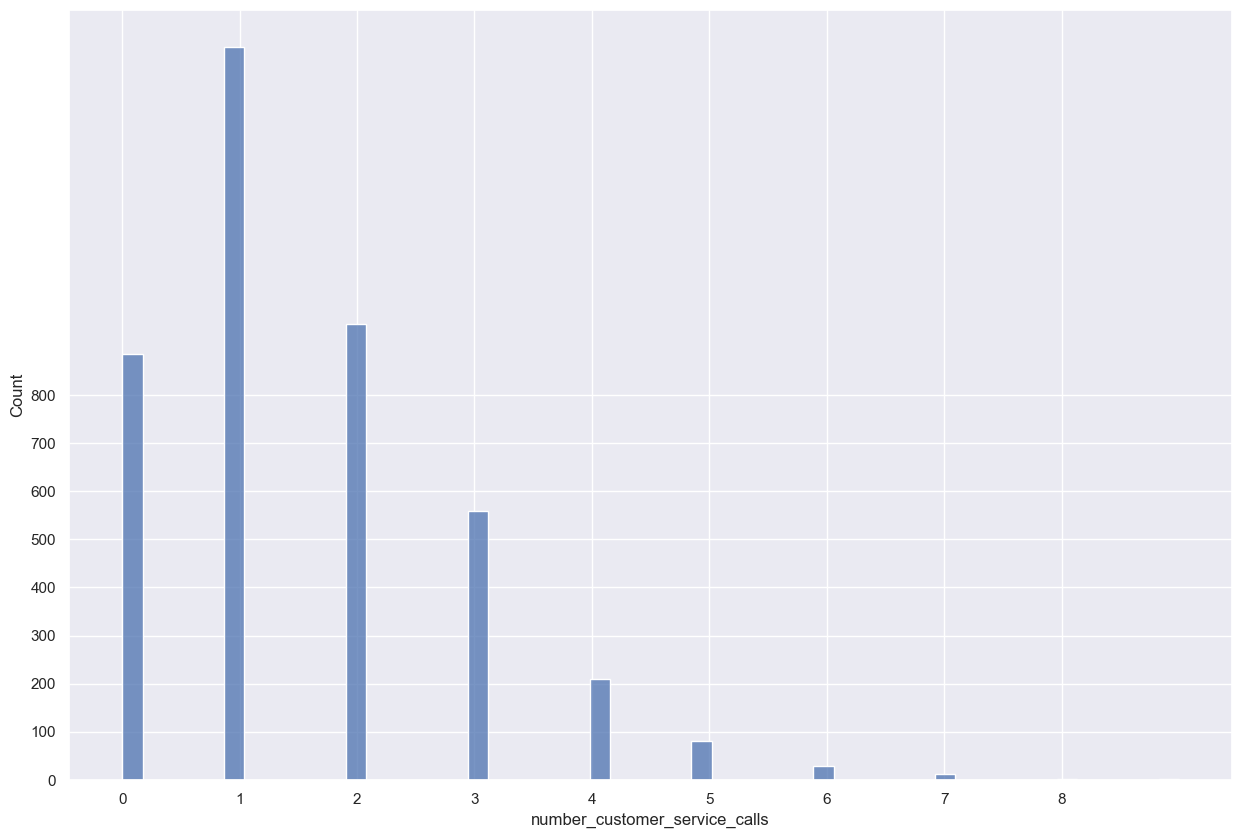

In [13]:
# построим график number_vmail_messages
plt.figure(figsize=(15,10)) # создаем "полотно", уточняем размер
sns.histplot(data=train, # какой датафрейм используем
             x='number_customer_service_calls', # какую переменную отрисовываем
             bins = 52) # на сколько ячеек разбиваем
             #log_scale = True); # захотели использовать логарифмический масштаб (для очень больших диапазонов)
plt.xticks(np.arange(0, train['number_customer_service_calls'].max(), step=1))
plt.yticks(np.arange(0, train[train['number_customer_service_calls'] == 0]['number_customer_service_calls'].count(), step=100))
plt.show()

В данном случае распределенеи Пуассона , я не вижу смысла приводить данный график  к нормальному рапсредлению . кол-во звонков не может быть отрицательным . я пытался сделать нормальное распределению по коду ниже , но выдает ошибку , у меня возникли вопросы:
* как приветси в итоге эти данные к нормальному рапсределению ? Ведь есть 0 , т.е. сделать логарифмирование не получится, стоит ли в данном случае менять их на медиану /среднее?

In [14]:
#plt.figure(figsize=(15,6)) # создаем "полотно", уточняем размер
#sns.histplot(data=train, # какой датафрейм используем
#             x='number_customer_service_calls_2', # какую переменную отрисовываем
#             bins = 20, # на сколько ячеек разбиваем
#             log_scale = True); # захотели использовать логарифмический масштаб (для очень больших диапазонов)

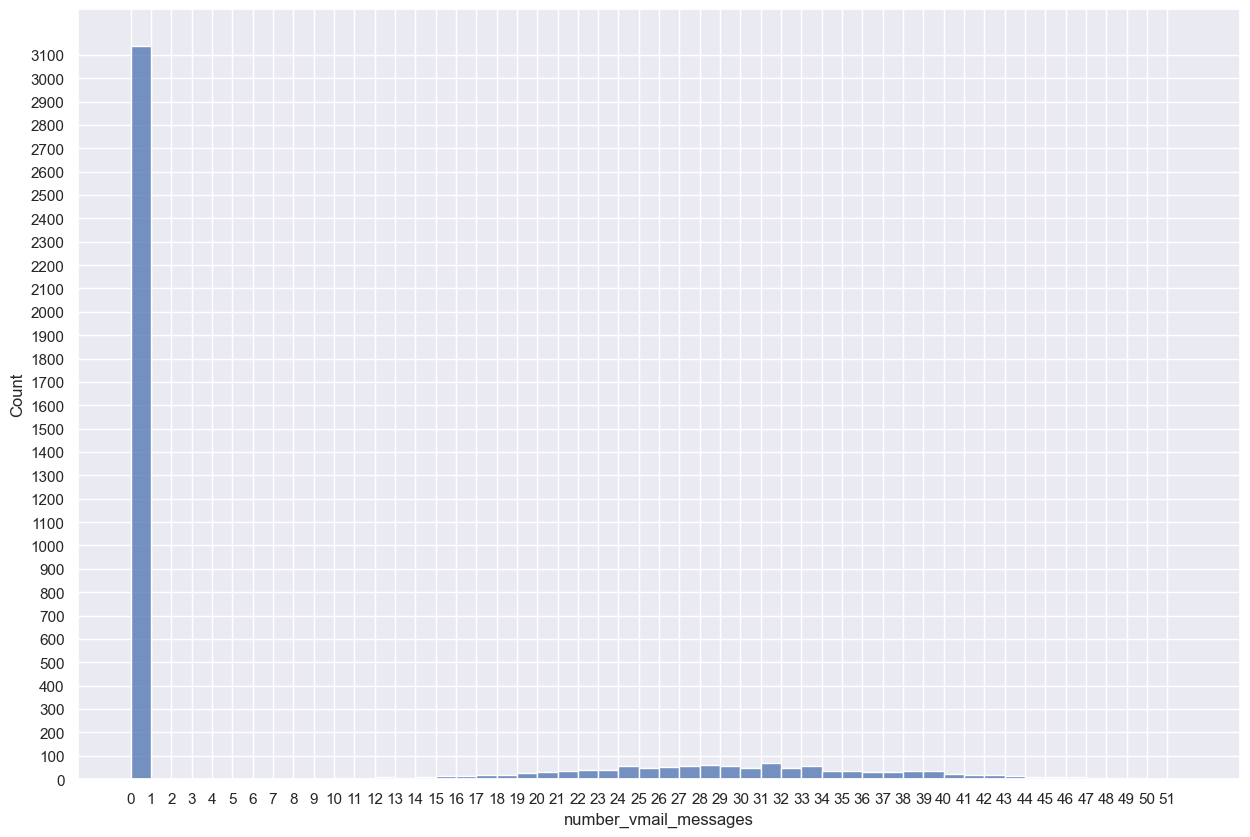

In [15]:
# построим график number_vmail_messages
plt.figure(figsize=(15,10)) # создаем "полотно", уточняем размер
sns.histplot(data=train, # какой датафрейм используем
             x='number_vmail_messages', # какую переменную отрисовываем
             bins = 52) # на сколько ячеек разбиваем
             #log_scale = True); # захотели использовать логарифмический масштаб (для очень больших диапазонов)
plt.xticks(np.arange(0, train['number_vmail_messages'].max(), step=1))
plt.yticks(np.arange(0, train[train['number_vmail_messages'] == 0]['number_vmail_messages'].count(), step=100))
plt.show()

In [16]:
train[train['number_vmail_messages'] == 0]['number_vmail_messages'].count()

3139

Кол-во сообщений голосовой почты равное 0 , имеет 3139 значений , это большая часть из выборки, поэтому значения оставляем. Как вариант , мы можем рассмотреть боксплоты, по ним решить удалять ли выбросы различных хзначений. Если бы обучали модель я бы протетсировал это : змена на среднее, замена на медаину ,а так как медиана = 0 , тооставил бы как есть .

Так как целевой стоблец отток клиентов - сгруппируем по данному столбцу, убрав категориальные столбцы.

In [17]:
display(train.groupby(['churn'])[num_columns[0:2] + [num_columns[-1]]].agg( [ ('min',np.min),
                                ('Q5%', lambda x: np.percentile(x, q=5)),
                                ('median',np.median),
                                ('Q95%',lambda x: np.percentile(x, q=95)),
                                ('max', np.max),
                                ('std',np.std)]))

account_length                                       \
                 min   Q5% median    Q95%  max        std   
churn                                                       
no                 1  35.0   99.0  166.00  243  39.748743   
yes                2  38.0  101.0  171.15  225  39.369162   

      number_vmail_messages                                   \
                        min  Q5% median  Q95% max        std   
churn                                                          
no                        0  0.0    0.0  37.0  52  13.706304   
yes                       0  0.0    0.0  33.0  48  11.124649   

      number_customer_service_calls                                 
                                min  Q5% median Q95% max       std  
churn                                                               
no                                0  0.0    1.0  3.0   8  1.165159  
yes                               0  0.0    2.0  5.0   9  1.827334

* по кол-ву месяцев : большой разницы нет, у тех, кто ушел, по медиане было большее кол-во месяцев, чем у тех кто остался
* по кол-ву сообщений голосовой почты: больше половины у обоих групп не пользовалисб голосовой почтой.
* по кл-ву звонков в службу поддержки: можно учесть , что ушедшие звонили чаще .

In [18]:
display(train.groupby(['churn'])[num_columns[2:5]].agg( [ ('min',np.min),
                                ('Q5%', lambda x: np.percentile(x, q=5)),
                                ('median',np.median),
                                ('Q95%',lambda x: np.percentile(x, q=95)),
                                ('max', np.max),
                                ('std',np.std)]))

total_day_minutes                                             \
                    min     Q5%  median     Q95%    max        std   
churn                                                                
no                  0.0  90.455  178.25  253.335  313.8  49.549782   
yes                 0.0  96.770  220.55  312.000  351.5  69.183493   

      total_day_calls                                      total_day_charge  \
                  min   Q5% median    Q95%  max        std              min   
churn                                                                         
no                  0  67.0  100.0  132.45  160  19.659616              0.0   
yes                 0  66.0  101.0  134.00  165  20.988919              0.0   

                                                 
          Q5%  median    Q95%    max        std  
churn                                            
no     15.381  30.300  43.067  53.35   8.423424  
yes    16.454  37.495  53.040  59.76  11.761417

* по общему кол-ву минут дневных звонков есть интересная особенность те, кто ушел по медиане общались на 42 минуты дольше, также разброс у данных отличается приблизительно на 20. Интересно почему? 
* по кол-ву дневных звонков : значимой разницы нет.
* по стоимости дневных звонков: у тех, кто ушел медаинная стоимость была на 7 (валюта) больше. Возможно, один из факторов ухода.

In [19]:
display(train.groupby(['churn'])[num_columns[5:8]].agg( [ ('min',np.min),
                                ('Q5%', lambda x: np.percentile(x, q=5)),
                                ('median',np.median),
                                ('Q95%',lambda x: np.percentile(x, q=95)),
                                ('max', np.max),
                                ('std',np.std)]))

total_eve_minutes                                             \
                    min      Q5% median     Q95%    max        std   
churn                                                                
no                  0.0  117.655  199.2  280.445  359.3  49.897726   
yes                70.9  124.385  210.2  296.805  349.4  51.312321   

      total_eve_calls                                     total_eve_charge  \
                  min   Q5% median   Q95%  max        std              min   
churn                                                                        
no                  0  67.0  100.0  133.0  170  19.936117             0.00   
yes                48  68.0   99.5  131.0  168  19.752909             6.03   

                                               
         Q5% median     Q95%    max       std  
churn                                          
no     10.00  16.93  23.8345  30.54  4.241312  
yes    10.57  17.87  25.2245  29.70  4.361545

* по общему кол-ву минут вечерних звонков у ушедих по медиане на 10 минут больше . Интересно у тех, кто ушел минимальное кол-во минут 70,9, у тех, кто остался 0.
* по кол-ву вечерних звонков : В основном большой разницы нет. Интересно у тех, кто ушел минимальное кол-во звонков 48, у тех, кто остался 0.
* по стоимости вечерних звонков: В основном большой разницы нет. Интересно у тех, кто ушел минимальная стомость 6.03 (влюта), у тех, кто остался 0.

In [20]:
display(train.groupby(['churn'])[num_columns[8:11]].agg( [ ('min',np.min),
                                ('Q5%', lambda x: np.percentile(x, q=5)),
                                ('median',np.median),
                                ('Q95%',lambda x: np.percentile(x, q=95)),
                                ('max', np.max),
                                ('std',np.std)]))

total_night_minutes                                           \
                      min     Q5% median    Q95%    max        std   
churn                                                                
no                    0.0  116.21  199.3  282.39  395.0  50.521152   
yes                  47.4  128.75  206.1  284.66  381.6  48.959820   

      total_night_calls                                      \
                    min   Q5% median   Q95%  max        std   
churn                                                         
no                    0  67.0  100.0  132.0  175  20.066126   
yes                  42  67.0   99.0  132.0  158  20.263378   

      total_night_charge                                           
                     min     Q5% median     Q95%    max       std  
churn                                                              
no                  0.00  5.2255  8.970  12.7045  17.77  2.273463  
yes                 2.13  5.7940  9.275  12.8130  17.17  2.203215

* по общему кол-ву минут ночных звонков: у ушедих по медиане на 7  минут больше , и минимальное кол-во мнут 47,4,  у тех, кто остался 0.
* по кол-ву ночных звонков : Интересно у тех, кто ушел минимальное кол-во ночных звонков 42, у тех, кто остался 0.
* по стоимости ночных звонков: В основном большой разницы нет. Интересно у тех, кто ушел минимальная стомость 2.13 (влюта), у тех, кто остался 0.

In [21]:
display(train.groupby(['churn'])[num_columns[11:14]].agg( [ ('min',np.min),
                                ('Q5%', lambda x: np.percentile(x, q=5)),
                                ('median',np.median),
                                ('Q95%',lambda x: np.percentile(x, q=95)),
                                ('max', np.max),
                                ('std',np.std)]))

total_intl_minutes                                   total_intl_calls  \
                     min  Q5% median  Q95%   max       std              min   
churn                                                                         
no                   0.0  5.7   10.3  14.6  19.7  2.749911                0   
yes                  0.0  5.8   10.6  14.8  20.0  2.794494                0   

                                     total_intl_charge                     \
       Q5% median Q95% max       std               min   Q5% median  Q95%   
churn                                                                       
no     1.0    4.0  9.0  19  2.433859               0.0  1.54   2.78  3.94   
yes    1.0    4.0  9.0  20  2.626925               0.0  1.57   2.86  4.00   

                       
        max       std  
churn                  
no     5.32  0.742466  
yes    5.40  0.754413

* по общему кол-ву интернациональных звонков: большой разницы нет.
* по кол-ву интернациональных звонков : большой разницы нет.
* по стоимости интернациональных звонков: большой разницы нет.

In [22]:
cm = sns.color_palette("flare", as_cmap=True) # создадим цветовой стиль, чтобы раскрасить табличку

train[num_columns].corr().style.background_gradient(cmap=cm, # наш цветовой стиль
                                    vmin = -2, # указываем нижний диапазон
                                    vmax=4) # указываем верхний  диапазон

по корреляции видно , что взаимно зависимые столбцы кол-во минут и стоимость в разное время дня имеют корреляцию близкую к 1. Во всех остальных случаях корреляция мала.

Можно добавить что некоторые векторы коллинеарны при дальнейшем обучении модели нам нужно в случахя , где 2 различных вектора имеют корреляцию 1 : 
1) соединить два признака в один
2) удалить один из признаков 

In [23]:
#Выбираем удаление столбцов 
#копируем дф для изменений

df = train.copy()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [25]:
df.drop(['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge'],axis=1, inplace= True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_eve_minutes              4250 non-null   float64
 9   total_eve_calls                4250 non-null   int64  
 10  total_night_minutes            4250 non-null   float64
 11  total_night_calls              4250 non-null   int64  
 12  total_intl_minutes             4250 non-null   f

len(num_columns)

In [27]:
num_columns_df, cat_columns_df = num_cat(df)

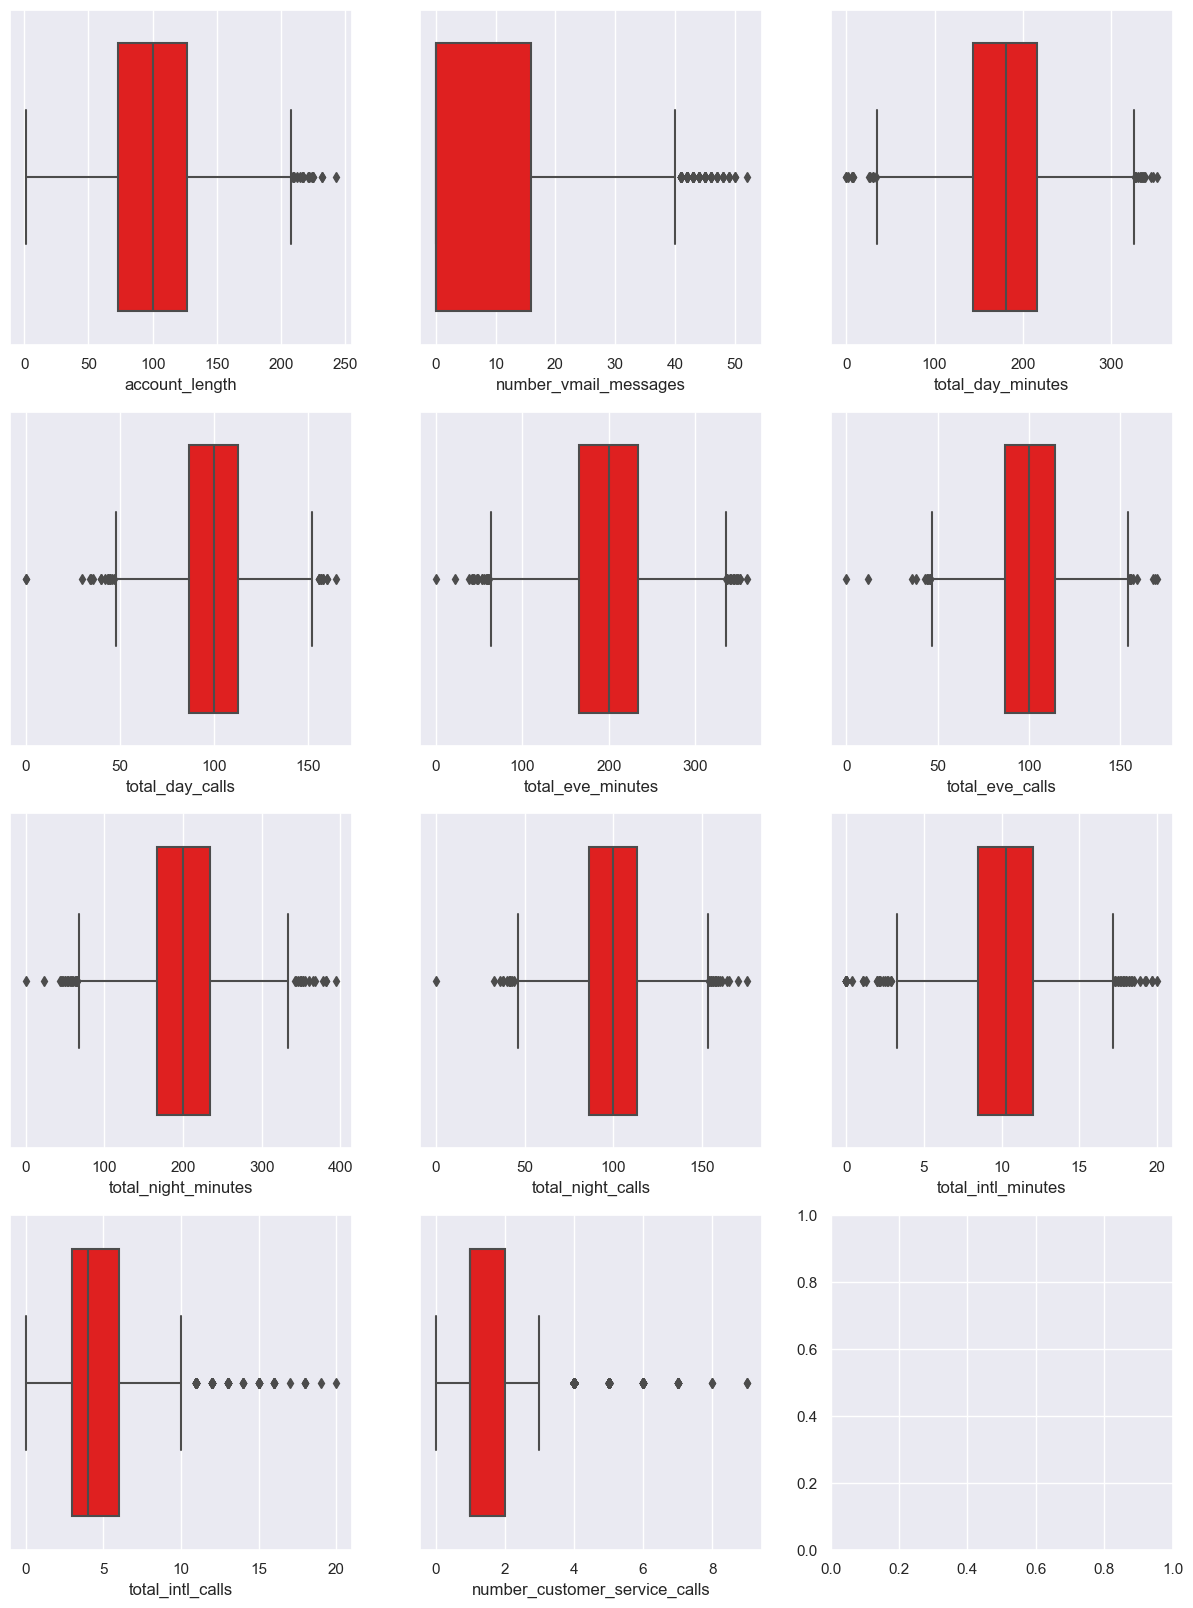

In [28]:
# Тут как в примере про гистограммы. Но на этот раз рисуем не в рамках сетки 2 на 2, а в рамках сетки 5 на 1
fig, ax = plt.subplots(nrows=round(len(num_columns_df)/3), ncols=3, figsize=(15,20))

for idx, column_name in enumerate(num_columns_df):
    plt.subplot(round(len(num_columns_df)/3),3, idx+1)
    sns.boxplot(data=df, # какой датафрейм используем
            x=column_name,
               color ='red'); # какую переменную используем
    #plt.show()

с выбросами хочу поработать cменой на медиану. Связано это с тем , что если мы удалим данные , то удалятся строки в других столбцах,где могут быть и нормальные значения . Но для столбца number_vmail_messages нет - у него больше 60% значений 0 . Удаляя дургие знаечния наш бокслпот покажет огромное кол-во новых выбросов.

In [29]:
#df.loc[df['number_vmail_messages']> 40,'number_vmail_messages']

In [30]:
def drop_quantile(column,df =df):
    #получаем в итоге значения усов
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower_fence = q1 - 1.5*iqr
    upper_fence = q3 + 1.5*iqr
    

    #узнаем медиану
    median_df = df[column].median()
    if column == 'number_vmail_messages':

        return lower_fence, upper_fence

    #изменяем выбросы на медиану
    df.loc[df[column] < lower_fence,column] = median_df
    df.loc[df[column] > upper_fence,column] = median_df
    
    

In [31]:
#создадим список для итерации
second_num = [i for i in num_columns_df if i != 'number_vmail_messages']

# плучим выбросы
#lower_fence, upper_fence = drop_quantile('number_vmail_messages')

In [32]:
# удаляем пропуски по стобцу number_vmail_messages
#df = df[(df.number_vmail_messages > lower_fence) & (df.number_vmail_messages < upper_fence)]

In [33]:
for column in second_num:
    drop_quantile(column, df)

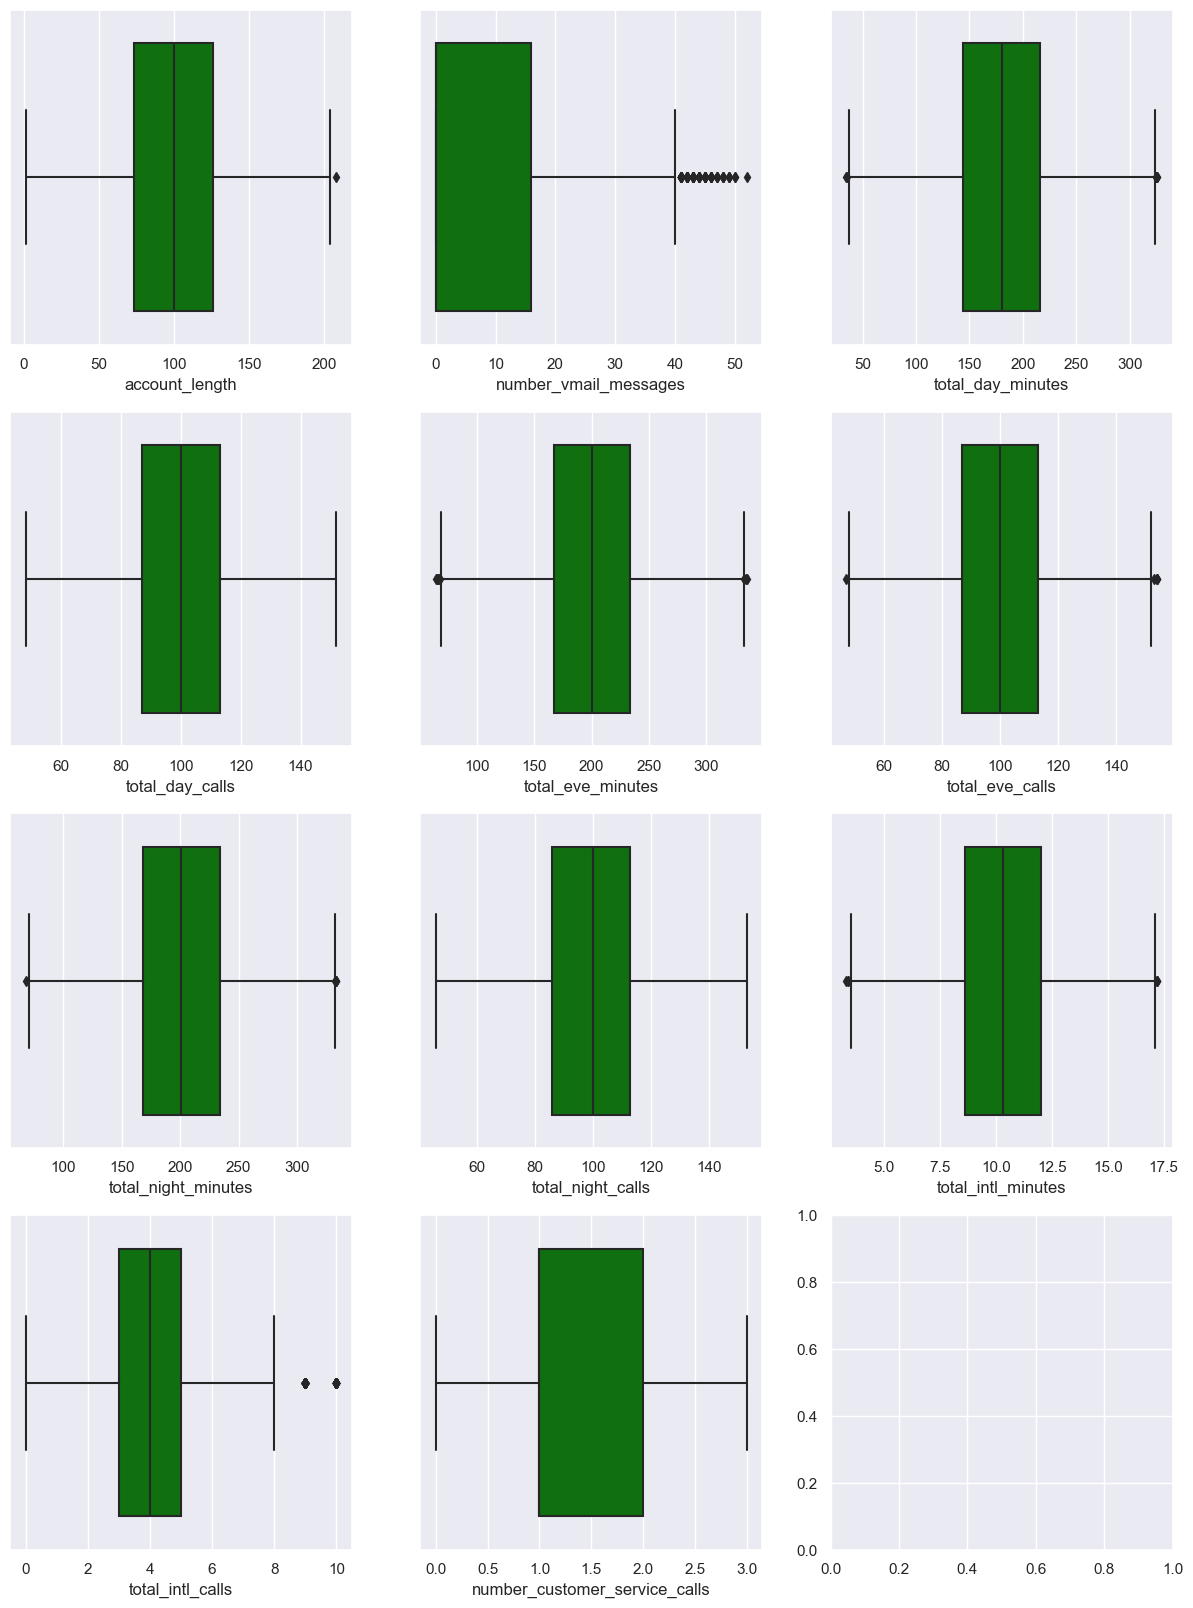

In [51]:
# Тут как в примере про гистограммы. Но на этот раз рисуем не в рамках сетки 2 на 2, а в рамках сетки 5 на 1
fig, ax = plt.subplots(nrows=round(len(num_columns_df)/3), ncols=3, figsize=(15,20))

for idx, column_name in enumerate(num_columns_df):
    plt.subplot(round(len(num_columns_df)/3),3, idx+1)
    sns.boxplot(data=df, # какой датафрейм используем
            x=column_name,
               color ='green'); # какую переменную используем
    #plt.show()

стало получше ! Выьросов меньше.

In [35]:
df

state  account_length      area_code international_plan voice_mail_plan  \
0       OH             107  area_code_415                 no             yes   
1       NJ             137  area_code_415                 no              no   
2       OH              84  area_code_408                yes              no   
3       OK              75  area_code_415                yes              no   
4       MA             121  area_code_510                 no             yes   
...    ...             ...            ...                ...             ...   
4245    MT              83  area_code_415                 no              no   
4246    WV              73  area_code_408                 no              no   
4247    NC              75  area_code_408                 no              no   
4248    HI              50  area_code_408                 no             yes   
4249    VT              86  area_code_415                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        26              161.6              123   
1                         0              243.4              114   
2                         0              299.4               71   
3                         0              166.7              113   
4                        24              218.2               88   
...                     ...                ...              ...   
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_eve_minutes  total_eve_calls  total_night_minutes  \
0                 195.5              103                254.4   
1                 121.2              110                162.6   
2                 200.7               88                196.9   
3                 148.3              122                186.9   
4                 200.7              108                212.6   
...                 ...              ...                  ...   
4245              243.8               88                213.7   
4246              131.2               82                186.2   
4247              193.1              126                129.1   
4248              223.0              126                297.5   
4249              267.1              104                154.8   

      total_night_calls  total_intl_minutes  total_intl_calls  \
0                   103                13.7                 3   
1                   104                12.2                 5   
2                    89                 6.6                 7   
3                   121                10.1                 3   
4                   118                 7.5                 7   
...                 ...                 ...               ...   
4245                 79                10.3                 6   
4246                 89                11.5                 6   
4247                104                 6.9                 7   
4248                116                 9.9                 5   
4249                100                 9.3                 4   

      number_customer_service_calls churn  
0                                 1    no  
1                                 0    no  
2                                 2    no  
3                                 3    no  
4                                 3    no  
...                             ...   ...  
4245                              0    no  
4246                              3    no  
4247                              1    no  
4248                              2    no  
4249                              0    no  

[4250 rows x 16 columns]

## Стандартизируем данные

В основном данные имеют нормальное рапсределение , их можно стандартизировать.

In [36]:
DF_scaled = df.copy() # чтобы не портить исходный датафрейм - складываем копию датафрейма в новый датафрейм
M = df[num_columns_df].mean() # находим среднее (для каждого числового признака)
STD = df[num_columns_df].std() # находим стандартное отклонение (для каждого числового признака)
DF_scaled[num_columns_df] = (df[num_columns_df]-M)/STD # реализуем стандартизацию. матричные операции работают

# Категориальные данные

In [37]:
df[cat_columns_df].nunique()

state                 51
area_code              3
international_plan     2
voice_mail_plan        2
churn                  2
dtype: int64

Неплохо, в трех столбцах - бинарные значения, в area code 3 , в 1 - 51 .

In [38]:
df['state'].value_counts()

state
WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: count, dtype: int64

В данном случае на редкие менять не будем

применим ordinal encoding

In [39]:
df_test = DF_scaled.copy()

In [40]:
from sklearn import preprocessing as prep 

In [41]:
Ordinal = prep.OrdinalEncoder()
Ordinal.fit(df_test[cat_columns_df])

OrdinalEncoder()

In [42]:
Ordinal_encoded = Ordinal.transform(df_test[cat_columns_df])
df_cat = pd.DataFrame(Ordinal_encoded, columns = Ordinal.feature_names_in_).astype(int)

In [43]:
df_cat

state  area_code  international_plan  voice_mail_plan  churn
0        35          1                   0                1      0
1        31          1                   0                0      0
2        35          0                   1                0      0
3        36          1                   1                0      0
4        19          2                   0                1      0
...     ...        ...                 ...              ...    ...
4245     26          1                   0                0      0
4246     49          0                   0                0      0
4247     27          0                   0                0      0
4248     11          0                   0                1      0
4249     46          1                   0                1      0

[4250 rows x 5 columns]

In [44]:
df_test

state  account_length      area_code international_plan voice_mail_plan  \
0       OH        0.188741  area_code_415                 no             yes   
1       NJ        0.961352  area_code_415                 no              no   
2       OH       -0.403594  area_code_408                yes              no   
3       OK       -0.635377  area_code_415                yes              no   
4       MA        0.549293  area_code_510                 no             yes   
...    ...             ...            ...                ...             ...   
4245    MT       -0.429348  area_code_415                 no              no   
4246    WV       -0.686885  area_code_408                 no              no   
4247    NC       -0.635377  area_code_408                 no              no   
4248    HI       -1.279220  area_code_408                 no             yes   
4249    VT       -0.352086  area_code_415                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                  1.366696          -0.354672         1.196514   
1                 -0.567845           1.200795         0.727536   
2                 -0.567845           2.265662        -1.513139   
3                 -0.567845          -0.257693         0.675427   
4                  1.217885           0.721605        -0.627291   
...                     ...                ...              ...   
4245              -0.567845           0.153042        -1.565248   
4246              -0.567845          -0.044719        -0.575182   
4247              -0.567845          -0.181631         0.050122   
4248               2.408372           1.054376         1.404949   
4249               1.961939          -0.966970         0.102231   

      total_eve_minutes  total_eve_calls  total_night_minutes  \
0             -0.100184         0.143999             1.113892   
1             -1.634424         0.505639            -0.788845   
2              0.007192        -0.630943            -0.077910   
3             -1.074829         1.125593            -0.285180   
4              0.007192         0.402314             0.247504   
...                 ...              ...                  ...   
4245           0.897174        -0.630943             0.270304   
4246          -1.427931        -0.940920            -0.299689   
4247          -0.149743         1.332244            -1.483199   
4248           0.467670         1.332244             2.007225   
4249           1.378302         0.195662            -0.950516   

      total_night_calls  total_intl_minutes  total_intl_calls  \
0              0.167723            1.340419         -0.591474   
1              0.219392            0.749822          0.380029   
2             -0.555641           -1.455073          1.351533   
3              1.097764           -0.077014         -0.591474   
4              0.942757           -1.100715          1.351533   
...                 ...                 ...               ...   
4245          -1.072331            0.001732          0.865781   
4246          -0.555641            0.474210          0.865781   
4247           0.219392           -1.336954          1.351533   
4248           0.839419           -0.155760          0.380029   
4249           0.012717           -0.391999         -0.105722   

      number_customer_service_calls churn  
0                         -0.295223    no  
1                         -1.361238    no  
2                          0.770792    no  
3                          1.836806    no  
4                          1.836806    no  
...                             ...   ...  
4245                      -1.361238    no  
4246                       1.836806    no  
4247                      -0.295223    no  
4248                       0.770792    no  
4249                      -1.361238    no  

[4250 rows x 16 columns]

In [45]:
#удаляем категориальные столбцы
df_test = df_test.drop(cat_columns_df,axis=1)

In [46]:
#объединяем столбцы
df_test = pd.concat([df_test,df_cat], axis=1)

In [47]:
#посмотрим, что у нас получилось
df_test

account_length  number_vmail_messages  total_day_minutes  \
0           0.188741               1.366696          -0.354672   
1           0.961352              -0.567845           1.200795   
2          -0.403594              -0.567845           2.265662   
3          -0.635377              -0.567845          -0.257693   
4           0.549293               1.217885           0.721605   
...              ...                    ...                ...   
4245       -0.429348              -0.567845           0.153042   
4246       -0.686885              -0.567845          -0.044719   
4247       -0.635377              -0.567845          -0.181631   
4248       -1.279220               2.408372           1.054376   
4249       -0.352086               1.961939          -0.966970   

      total_day_calls  total_eve_minutes  total_eve_calls  \
0            1.196514          -0.100184         0.143999   
1            0.727536          -1.634424         0.505639   
2           -1.513139           0.007192        -0.630943   
3            0.675427          -1.074829         1.125593   
4           -0.627291           0.007192         0.402314   
...               ...                ...              ...   
4245        -1.565248           0.897174        -0.630943   
4246        -0.575182          -1.427931        -0.940920   
4247         0.050122          -0.149743         1.332244   
4248         1.404949           0.467670         1.332244   
4249         0.102231           1.378302         0.195662   

      total_night_minutes  total_night_calls  total_intl_minutes  \
0                1.113892           0.167723            1.340419   
1               -0.788845           0.219392            0.749822   
2               -0.077910          -0.555641           -1.455073   
3               -0.285180           1.097764           -0.077014   
4                0.247504           0.942757           -1.100715   
...                   ...                ...                 ...   
4245             0.270304          -1.072331            0.001732   
4246            -0.299689          -0.555641            0.474210   
4247            -1.483199           0.219392           -1.336954   
4248             2.007225           0.839419           -0.155760   
4249            -0.950516           0.012717           -0.391999   

      total_intl_calls  number_customer_service_calls  state  area_code  \
0            -0.591474                      -0.295223     35          1   
1             0.380029                      -1.361238     31          1   
2             1.351533                       0.770792     35          0   
3            -0.591474                       1.836806     36          1   
4             1.351533                       1.836806     19          2   
...                ...                            ...    ...        ...   
4245          0.865781                      -1.361238     26          1   
4246          0.865781                       1.836806     49          0   
4247          1.351533                      -0.295223     27          0   
4248          0.380029                       0.770792     11          0   
4249         -0.105722                      -1.361238     46          1   

      international_plan  voice_mail_plan  churn  
0                      0                1      0  
1                      0                0      0  
2                      1                0      0  
3                      1                0      0  
4                      0                1      0  
...                  ...              ...    ...  
4245                   0                0      0  
4246                   0                0      0  
4247                   0                0      0  
4248                   0                1      0  
4249                   0                1      0  

[4250 rows x 16 columns]

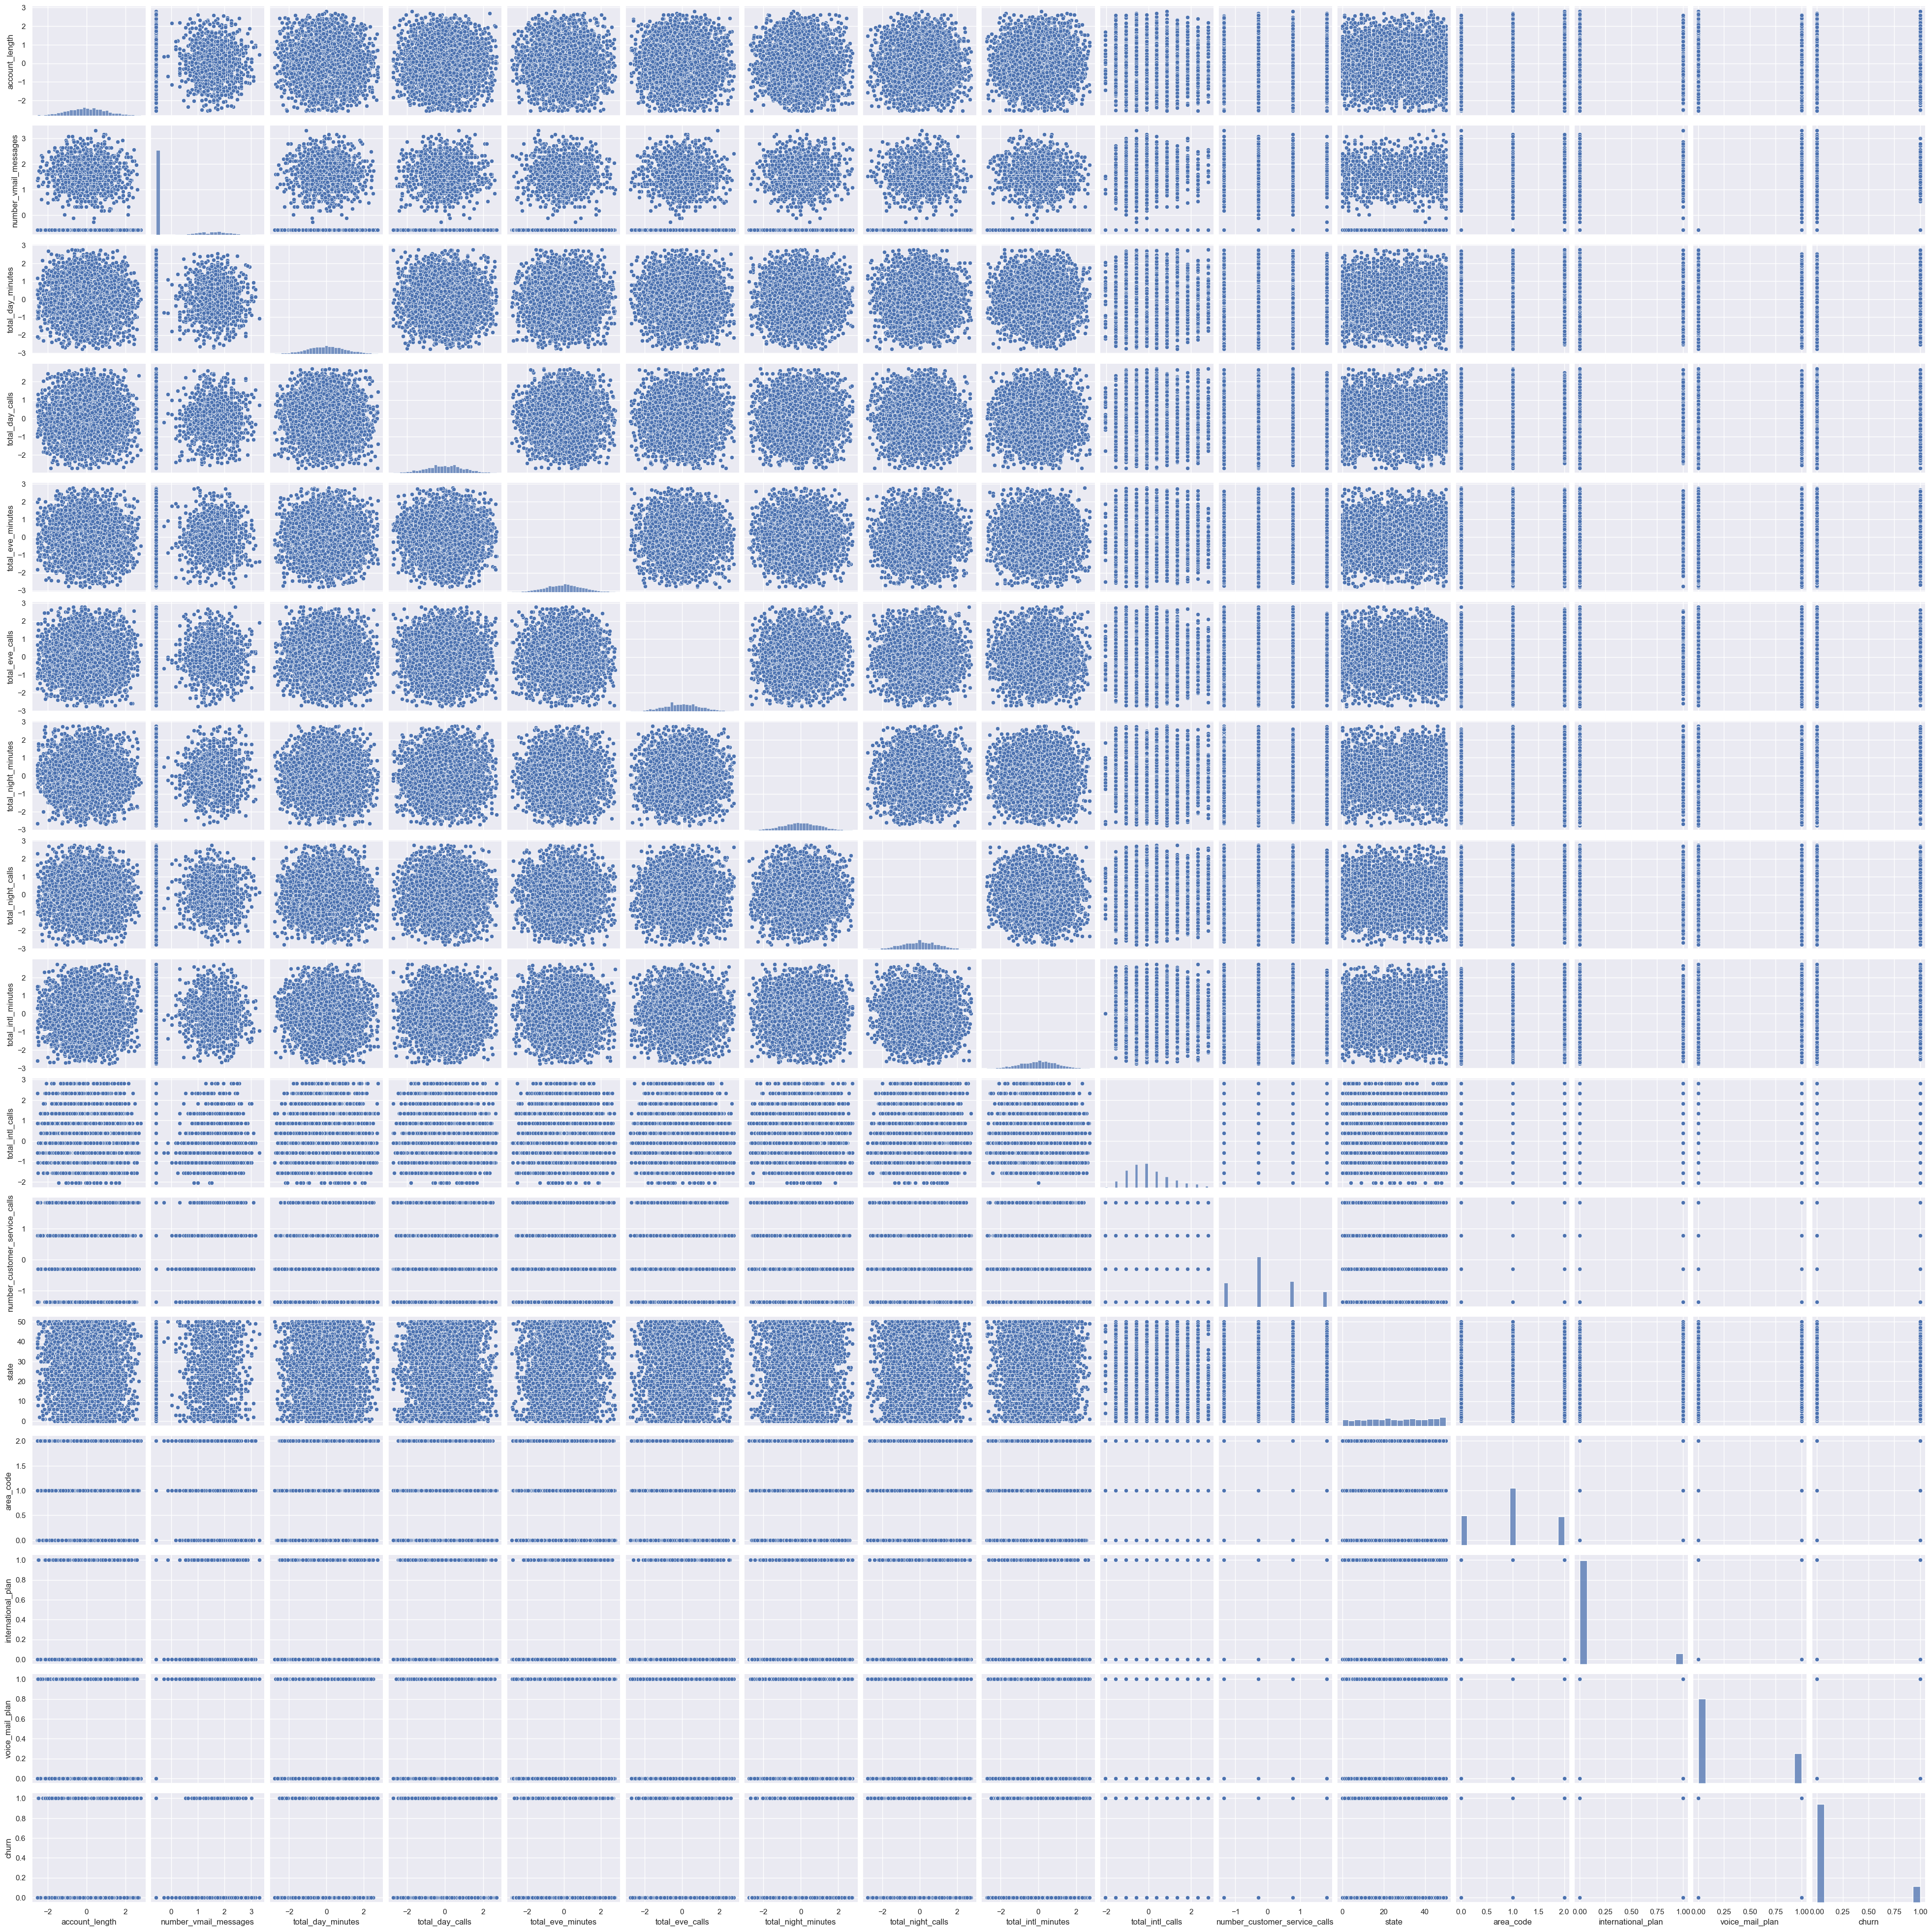

In [48]:
sns.pairplot(data = df_test)

График не читабельный , слишком много столбцов.